In [75]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, r2_score

In [76]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
data.shape

(1338, 7)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [79]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [80]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
data['sex'] = lab.fit_transform(data['sex'])
data['smoker'] = lab.fit_transform(data['smoker'])
data['region'] = lab.fit_transform(data['region'])

<AxesSubplot:xlabel='smoker', ylabel='count'>

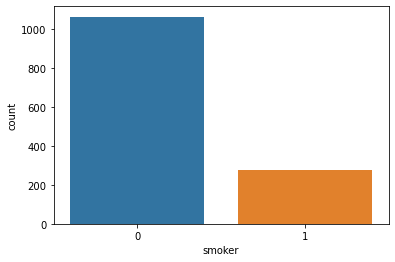

In [81]:
sns.countplot(x='smoker', data=data)

<AxesSubplot:xlabel='sex', ylabel='count'>

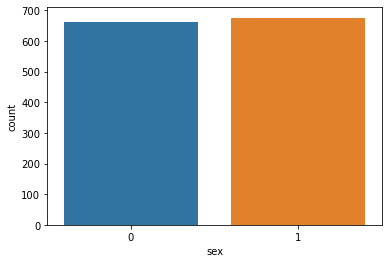

In [82]:
sns.countplot(x='sex', data=data)

In [83]:
x = data.iloc[:,data.columns!='charges']
y = data.iloc[:,data.columns=='charges']
x.head() #input

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1


In [84]:
y.head() #output

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [85]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("Linear Regression r2_score: ", r2_score(y_pred, y_test))

Linear Regression r2_score:  0.694979479035194


In [87]:
from sklearn import tree
regressor = tree.DecisionTreeRegressor()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("Decision Tree Regression r2_score: ", r2_score(y_pred, y_test))

Decision Tree Regression r2_score:  0.7339721776525516


In [88]:
from sklearn.svm import SVR
regressor = SVR()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("Support Vector Regressor r2_score: ", r2_score(y_pred, y_test))

Support Vector Regressor r2_score:  -34893.359699435736


C:\Users\Spandana\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [89]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)
print("Random Forest Regressor r2_score: ", r2_score(y_pred, y_test))

C:\Users\Spandana\AppData\Local\Temp\ipykernel_13504\866805447.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  regressor.fit(x_train, y_train)


Random Forest Regressor r2_score:  0.8469091568465598


In [90]:
test_vector = np.reshape(np.asarray([19,0,27.900,0,1,3]),(1,6))
p = int(regressor.predict(test_vector)[0])
p

C:\Users\Spandana\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


17116